# Libraries

normal libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette = 'hls', color_codes = True)
import re

classificasion models

In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
import tensorflow as tf

In [3]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

others

In [4]:
from sklearn.neighbors import LocalOutlierFactor as LOF
from sklearn.ensemble import IsolationForest
import rrcf
from sklearn import preprocessing

# Import data

In [5]:
train = pd.read_csv('train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<b> Problems </b>

- mising data: Age, Cabin, Embarked

# Explore

In [7]:
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Brown, Mrs. James Joseph (Margaret Tobin)",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


The max Fare and SibSp, Parch is susspicious

In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


must plot parch and sibsp and fare

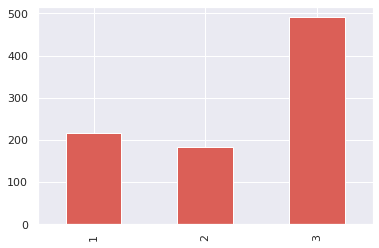

In [9]:
train['Pclass'].value_counts().sort_index().plot(kind = 'bar')

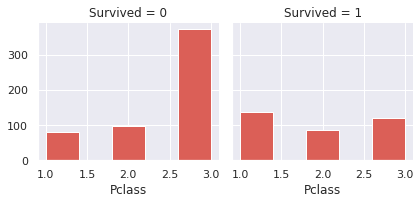

In [10]:
pclass = sns.FacetGrid(train, col = 'Survived')
pclass.map(plt.hist, 'Pclass', bins = 5)

the lower Pclass, the higher the chance of survive

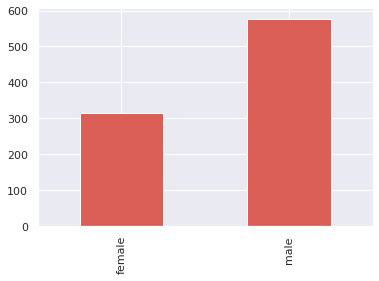

In [11]:
train['Sex'].value_counts().sort_index().plot(kind = 'bar')

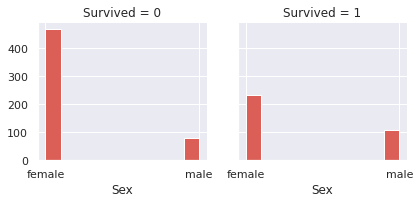

In [12]:
sex = sns.FacetGrid(train, col = 'Survived')
sex.map(plt.hist, 'Sex', bins =10)

female has higher chance to survive than male passengers, hmmm

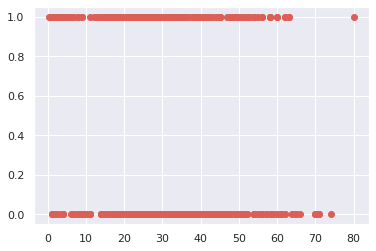

In [13]:
plt.scatter(train['Age'], train['Survived'])

the younger have better chance to survive

those people who are at their 30s or 40s are at the hand of luck?

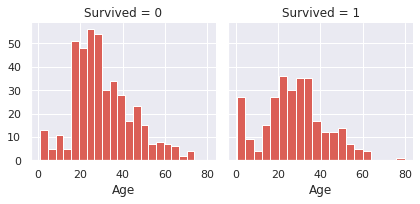

In [14]:
age = sns.FacetGrid(train, col = 'Survived')
age.map(plt.hist, 'Age', bins = 20)

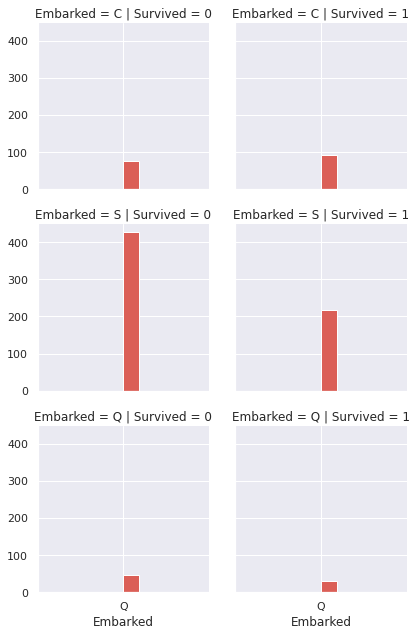

In [15]:
embarked = sns.FacetGrid(train, col = 'Survived', row = 'Embarked', row_order = ['C','S', 'Q'], palette = 'bright')
embarked.map(plt.hist,'Embarked', bins = 10)

people embarked from S has higher chance of survive, others seems to be equal

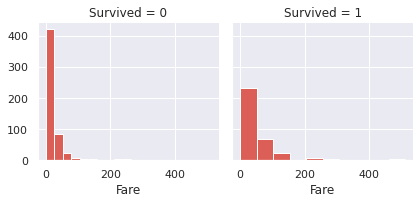

In [16]:
fare = sns.FacetGrid(train, col = 'Survived')
fare.map(plt.hist, 'Fare', bins = 10)

does fare has any influence to people chance of survive?

In [17]:
combine = [train, test]
for dataset in combine:
    dataset['familysize'] = dataset['SibSp']+dataset['Parch']+1

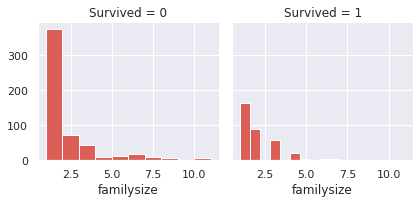

In [18]:
familysize = sns.FacetGrid(train, col = 'Survived')
familysize.map(plt.hist, 'familysize', bins = 10)

those who travel alone probably die, those who has a large family suffer such condition

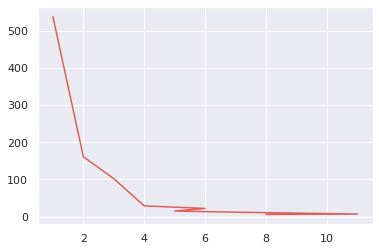

In [19]:
train['familysize'].value_counts().plot()

most people travel alone, is that why more people die?

this look like exponential (using log?) with some outliners, should pay attention to that

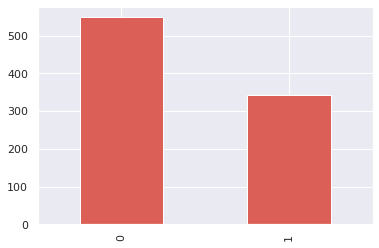

In [20]:
train['Survived'].value_counts().plot(kind = 'bar')

more of them to be dead than alive

After sometime spend digging on ticket, 1 number is the pclass, letter is somewhat important

Some people have the same ticket number hence must divide their fare

In [21]:
train[train['Fare']>250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familysize
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,6
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,6
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,5
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,6
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,6
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,2
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,5


# clensing

- remove duplicates
- fill missing values
- check if values are real
- detect anomalies

### Name
extract last name, title for later on

In [22]:
for dataset in combine:
    Title = []
    for x in range(len(dataset['Name'])):
        Title.append(re.findall(r"([A-Za-z]+)\.", dataset['Name'][x])[0])
    dataset['Title'] = Title
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familysize,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,Mrs


In [23]:
for dataset in combine:
    lastname = []
    for x in range(len(dataset['Name'])):
        lastname.append(re.findall(r"([A-Za-z]+)\,", dataset['Name'][x])[0])
    dataset['lastname'] = lastname
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familysize,Title,lastname
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,Mr,Kelly
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,Mrs,Wilkes
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,Mr,Myles
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,Mr,Wirz
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,Mrs,Hirvonen


### Ticket, Fare and cabin

those has same ticket should have the same cabin

In [24]:
for dataset in combine:
    ticketcount = dataset['Ticket'].value_counts()
    uniqueticket = dataset['Ticket'].unique()
    for x in range(len(uniqueticket)):
        dataset.loc[(dataset["Ticket"] == uniqueticket[x]), 'Cabin'] = dataset.loc[(dataset["Ticket"] == uniqueticket[x]), 'Cabin'].replace()

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        209 non-null    object 
 11  Embarked     889 non-null    object 
 12  familysize   891 non-null    int64  
 13  Title        891 non-null    object 
 14  lastname     891 non-null    object 
dtypes: float64(2), int64(6), object(7)
memory usage: 104.5+ KB


#### conclusion

- no duplicated values
- train set: missing values in embarked, age and cabin
- test set: missing values in age, fare, cabin
- the research show that the fare at 500 pound is not unreal, so acceptable
- family size is considering
- will drop cabin temporaly

In [26]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female': 0,'male':1})
    dataset = dataset.drop(['Cabin','lastname','Name','SibSp','Parch','Ticket'], axis = 1, inplace = True)
    

fill up age in train dataset, the age should base on sex, familysize, maybe title too
- need to map sex to 1s and 0s

In [27]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [28]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [29]:
for df in combine:
    df['Title'] = df['Title'].replace(['Ms','Miss','Mme','Mlle','Dona'], 'Ms')

In [30]:
for dataset in combine:
    dataset['Age'] = dataset.groupby(['Sex', 'Title'])['Age'].apply(lambda x: x.fillna(x.median()))
    dataset['Age'] = dataset['Age'].astype(int)

fill up embarked (train), fare(test)

In [31]:
train['Embarked'] = train['Embarked'].fillna('S')

In [32]:
test['Fare'] = test.groupby(['Pclass','Embarked'])['Fare'].apply(lambda x: x.fillna(x.mean()))

- format the data (text to ordinal)
- detect anomalies
- done cleansing

In [33]:
train['Title'].value_counts()

Mr          517
Ms          186
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Countess      1
Sir           1
Capt          1
Jonkheer      1
Don           1
Lady          1
Name: Title, dtype: int64

In [34]:
test['Title'].value_counts()

Mr        240
Ms         80
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Name: Title, dtype: int64

In [35]:
for df in combine:
    df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2})
    df['Title'] = df['Title'].replace('Mr', 0)
    df['Title'] = df['Title'].replace(['Master','Ms','Mrs'],1)
    df['Title'] = df['Title'].replace(['Dr', 'Rev','Col','Major','Sir','Countess','Capt','Lady','Jonkheer','Don'],2)

In [36]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,familysize,Title
0,1,0,3,1,22,7.2500,0,2,0
1,2,1,1,0,38,71.2833,1,2,1
2,3,1,3,0,26,7.9250,0,1,1
3,4,1,1,0,35,53.1000,0,2,1
4,5,0,3,1,35,8.0500,0,1,0


detect anomalies

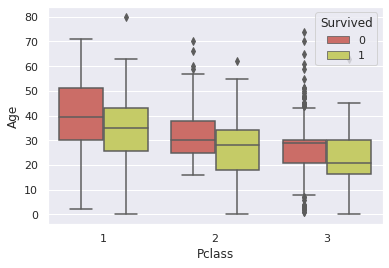

In [37]:
sns.boxplot(x = 'Pclass', y = 'Age', data = train, hue = 'Survived')

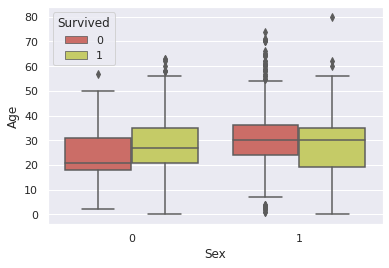

In [38]:
sns.boxplot(x = 'Sex', y = 'Age', data = train, hue = 'Survived')

In [39]:
for df in combine:
    IF = IsolationForest(n_estimators = 50, contamination = 0.1, max_features = 3)
    IF.fit(df[['Pclass', 'Age', 'Sex','Fare','Embarked','familysize','Title']])
    df['outlinerIF'] = IF.predict(df[['Pclass', 'Age', 'Sex','Fare','Embarked','familysize','Title']])

In [40]:
for df in combine:
    lof = LOF(n_neighbors = 20, contamination = 0.1)
    df['outlinerLOF'] = lof.fit_predict(df[['Pclass', 'Age', 'Sex','Fare','Embarked','familysize','Title']])

In [41]:
for df in combine:
    df['anomalies'] = df['outlinerIF'] + df['outlinerLOF']
    df.loc[df.anomalies == 0, 'anomalies'] = 1
    df.loc[df.anomalies == 2, 'anomalies'] = 0
    df.loc[df.anomalies == -2, 'anomalies'] = 2
    df = df.drop(['outlinerIF','outlinerLOF'], axis =1, inplace = True)

## Balancing

In [42]:
input_unscale = train[['Pclass', 'Age', 'Sex','Fare','Embarked','familysize','Title','anomalies']]
target = train['Survived']

In [43]:
input_unscale

,Pclass,Age,Sex,Fare,Embarked,familysize,Title,anomalies
0,3,22,1,7.2500,0,2,0,0
1,1,38,0,71.2833,1,2,1,0
2,3,26,0,7.9250,0,1,1,0
3,1,35,0,53.1000,0,2,1,0
4,3,35,1,8.0500,0,1,0,0
...,...,...,...,...,...,...,...,...
886,2,27,1,13.0000,0,1,2,0
887,1,19,0,30.0000,0,1,1,0
888,3,21,0,23.4500,0,4,1,0
889,1,26,1,30.0000,1,1,0,0


In [44]:
num_ones = train['Survived'].value_counts()[1]
zeros_counter = 0
indices_to_remove = []

for i in range(target.shape[0]):
    if target[i] == 0:
        zeros_counter +=1
        if zeros_counter > num_ones:
            indices_to_remove.append(i)

equal_unscale_input = input_unscale.drop(indices_to_remove, axis = 0)
equal_target = target.drop(indices_to_remove, axis = 0)

In [45]:
equal_unscale_input

,Pclass,Age,Sex,Fare,Embarked,familysize,Title,anomalies
0,3,22,1,7.2500,0,2,0,0
1,1,38,0,71.2833,1,2,1,0
2,3,26,0,7.9250,0,1,1,0
3,1,35,0,53.1000,0,2,1,0
4,3,35,1,8.0500,0,1,0,0
...,...,...,...,...,...,...,...,...
875,3,15,0,7.2250,1,1,1,0
879,1,56,0,83.1583,1,2,1,1
880,2,25,0,26.0000,0,2,1,0
887,1,19,0,30.0000,0,1,1,0


In [46]:
test

,PassengerId,Pclass,Sex,Age,Fare,Embarked,familysize,Title,anomalies
0,892,3,1,34,7.8292,2,1,0,1
1,893,3,0,47,7.0000,0,2,1,0
2,894,2,1,62,9.6875,2,1,0,2
3,895,3,1,27,8.6625,0,1,0,0
4,896,3,0,22,12.2875,0,3,1,0
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,28,8.0500,0,1,0,0
414,1306,1,0,39,108.9000,1,1,1,1
415,1307,3,1,38,7.2500,0,1,0,0
416,1308,3,1,28,8.0500,0,1,0,0


## preprocessing

In [47]:
scaled_input = preprocessing.scale(equal_unscale_input)

test_input = preprocessing.scale(test.drop('PassengerId', axis = 1))

In [48]:
shuffle = np.arange(scaled_input.shape[0])
np.random.shuffle(shuffle)

shuffled_input = scaled_input[shuffle]
shuffled_target = equal_target.to_numpy()[shuffle]

## splitting

In [49]:
obs = shuffled_target.shape[0]

train_nums = int(0.8*obs)
validation_nums = int(0.2*obs)

train_input = shuffled_input[:train_nums]
train_target = shuffled_target[:train_nums]

validation_input = shuffled_input[train_nums:train_nums+validation_nums]
validation_target = shuffled_target[train_nums:train_nums+validation_nums]


In [50]:
train_input = train_input.astype(np.float)
train_target = train_target.astype(np.int)

validation_input = validation_input.astype(np.float)
validation_target = validation_target.astype(np.int)

# Model

In [51]:
#outline
input_size = 8
output_size = 2
hidden_layer_size = 100
init_mode = 'he_normal'

model = tf.keras.Sequential([tf.keras.layers.Dense(hidden_layer_size,kernel_initializer=init_mode, activation = 'relu'),
                             tf.keras.layers.Dense(hidden_layer_size,kernel_initializer=init_mode, activation = 'relu'),
                             tf.keras.layers.Dense(hidden_layer_size,kernel_initializer=init_mode, activation = 'relu'),
                             tf.keras.layers.Dense(hidden_layer_size,kernel_initializer=init_mode, activation = 'relu'),
                             tf.keras.layers.Dense(hidden_layer_size,kernel_initializer=init_mode, activation = 'relu'),
                             tf.keras.layers.Dense(output_size,kernel_initializer=init_mode, activation = 'softmax')
                            ])

#setting hyperparameter
batch_size = 100
max_epochs = 100
learning_rate = 0.001
decay_rate = learning_rate/max_epochs
momentum = 0.9
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 3)

#compile
rms = tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, momentum = 0.8, epsilon=None, decay=decay_rate)
sgd = tf.keras.optimizers.SGD(lr = learning_rate, momentum = momentum, decay = decay_rate, nesterov = False)

model.compile(optimizer = rms, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#schedule learning rate

def scheduler(epoch):
    if epoch < 4:
        return 0.001
    else:
        return 0.001 * tf.math.exp(-decay_rate*epoch)

loss_history = tf.keras.callbacks.History()
learning_rate = tf.keras.callbacks.LearningRateScheduler(scheduler)
callbacks_list = [loss_history, learning_rate, early_stopping]

#fit

model.fit(train_input, train_target, batch_size = batch_size, epochs = max_epochs,
         callbacks = callbacks_list,validation_data = (validation_input, validation_target), verbose = 2)

Epoch 1/100
6/6 - 0s - loss: 0.6622 - accuracy: 0.6618 - val_loss: 0.5114 - val_accuracy: 0.7426 - lr: 0.0010
Epoch 2/100
6/6 - 0s - loss: 0.5214 - accuracy: 0.7495 - val_loss: 0.4520 - val_accuracy: 0.8235 - lr: 0.0010
Epoch 3/100
6/6 - 0s - loss: 0.4685 - accuracy: 0.8007 - val_loss: 0.4129 - val_accuracy: 0.8382 - lr: 0.0010
Epoch 4/100
6/6 - 0s - loss: 0.4096 - accuracy: 0.8282 - val_loss: 0.4531 - val_accuracy: 0.8015 - lr: 0.0010
Epoch 5/100
6/6 - 0s - loss: 0.4141 - accuracy: 0.8026 - val_loss: 0.4386 - val_accuracy: 0.8088 - lr: 9.9996e-04
Epoch 6/100
6/6 - 0s - loss: 0.4026 - accuracy: 0.8318 - val_loss: 0.4007 - val_accuracy: 0.8382 - lr: 9.9995e-04
Epoch 7/100
6/6 - 0s - loss: 0.4094 - accuracy: 0.8263 - val_loss: 0.4209 - val_accuracy: 0.8456 - lr: 9.9994e-04
Epoch 8/100
6/6 - 0s - loss: 0.3795 - accuracy: 0.8428 - val_loss: 0.4796 - val_accuracy: 0.7868 - lr: 9.9993e-04
Epoch 9/100
6/6 - 0s - loss: 0.4095 - accuracy: 0.8135 - val_loss: 0.4242 - val_accuracy: 0.8162 - lr: 9

In [52]:
def create_model(init_mode = 'uniform'):
    input_size = 8
    output_size = 2
    hidden_layer_size = 100

    model = tf.keras.Sequential([tf.keras.layers.Dense(hidden_layer_size,kernel_initializer=init_mode, activation = 'relu'),
                                 tf.keras.layers.Dense(hidden_layer_size,kernel_initializer=init_mode, activation = 'relu'),
                                 tf.keras.layers.Dense(hidden_layer_size,kernel_initializer=init_mode, activation = 'relu'),
                                 tf.keras.layers.Dense(hidden_layer_size,kernel_initializer=init_mode, activation = 'relu'),
                                 tf.keras.layers.Dense(hidden_layer_size,kernel_initializer=init_mode, activation = 'relu'),
                                 tf.keras.layers.Dense(output_size,kernel_initializer=init_mode, activation = 'softmax')
                                ])
    
    model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return model

In [53]:
%%time
seed = 7
np.random.seed(seed)
batch_size = [70,100,150,200]
epochs = [25,50,100]

model_CV = KerasClassifier(build_fn=create_model, verbose=2)
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 
             'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']

param_grid = dict(init_mode=init_mode, batch_size = batch_size, epochs = epochs)

grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=-1, cv=3, refit = True)

grid_result = grid.fit(train_input, train_target)

Epoch 1/100
8/8 - 0s - loss: 0.8359 - accuracy: 0.5594
Epoch 2/100
8/8 - 0s - loss: 0.6839 - accuracy: 0.6435
Epoch 3/100
8/8 - 0s - loss: 0.5708 - accuracy: 0.7349
Epoch 4/100
8/8 - 0s - loss: 0.5129 - accuracy: 0.7733
Epoch 5/100
8/8 - 0s - loss: 0.4964 - accuracy: 0.7678
Epoch 6/100
8/8 - 0s - loss: 0.4798 - accuracy: 0.7806
Epoch 7/100
8/8 - 0s - loss: 0.4685 - accuracy: 0.7788
Epoch 8/100
8/8 - 0s - loss: 0.4605 - accuracy: 0.7824
Epoch 9/100
8/8 - 0s - loss: 0.4549 - accuracy: 0.7952
Epoch 10/100
8/8 - 0s - loss: 0.4492 - accuracy: 0.7916
Epoch 11/100
8/8 - 0s - loss: 0.4439 - accuracy: 0.8026
Epoch 12/100
8/8 - 0s - loss: 0.4402 - accuracy: 0.8026
Epoch 13/100
8/8 - 0s - loss: 0.4348 - accuracy: 0.8080
Epoch 14/100
8/8 - 0s - loss: 0.4336 - accuracy: 0.8026
Epoch 15/100
8/8 - 0s - loss: 0.4292 - accuracy: 0.8080
Epoch 16/100
8/8 - 0s - loss: 0.4237 - accuracy: 0.8154
Epoch 17/100
8/8 - 0s - loss: 0.4222 - accuracy: 0.8172
Epoch 18/100
8/8 - 0s - loss: 0.4179 - accuracy: 0.8227
E

In [54]:
grid_result.best_score_, grid_result.best_params_, grid_result.cv_results_

(0.7898176511128744,
 {'batch_size': 70, 'epochs': 100, 'init_mode': 'he_normal'},
 {'mean_fit_time': array([1.86718376, 1.78759805, 1.70936465, 1.80908926, 2.31523927,
         2.60798367, 2.44273202, 2.03096493, 2.8613588 , 3.31035002,
         2.68802762, 2.77591228, 4.16346097, 4.60841068, 2.72660947,
         2.81953518, 4.42515246, 4.66666174, 4.88672709, 4.48965804,
         4.38331183, 5.19440627, 5.19250989, 3.94670757, 1.65080277,
         1.37446245, 1.54467893, 1.78631846, 1.48362192, 2.0229946 ,
         1.71460565, 1.87028885, 2.28986573, 2.68519688, 2.34243997,
         2.32385484, 2.08660897, 2.34669606, 2.15126181, 2.12581325,
         3.7121834 , 3.54167914, 3.28484233, 3.46360048, 3.67177137,
         3.90474796, 4.03956016, 3.80180987, 1.71295134, 1.79812344,
         2.1061759 , 1.96473296, 2.45131199, 1.6979816 , 1.71847153,
         1.75417773, 2.40951403, 2.62352451, 2.3147227 , 2.12738101,
         2.33706522, 2.33100986, 2.20966959, 2.28396352, 3.28356751,
   

In [55]:
result_CV = grid_result.predict(test_input)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
6/6 - 0s


In [56]:
result = model.predict_classes(test_input)

In [57]:
submission = pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived' : result_CV})

In [58]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [59]:
submission.to_csv('submission.csv', index = False)

In [60]:
submission['Survived'].value_counts()

0    215
1    203
Name: Survived, dtype: int64

In [61]:
grid_result.predict(test_input)

6/6 - 0s


array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,